# Objective:

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

In [58]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ottdata.csv')
df

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46
...,...,...,...,...,...,...,...,...
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47


### EDA

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [61]:
df.columns

Index(['visitors', 'ad_impressions', 'major_sports_event', 'genre',
       'dayofweek', 'season', 'views_trailer', 'views_content'],
      dtype='object')

In [62]:
df.dtypes

visitors              float64
ad_impressions        float64
major_sports_event      int64
genre                  object
dayofweek              object
season                 object
views_trailer         float64
views_content         float64
dtype: object

In [64]:
df.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


#### Insights:

- There are 1000 rows and 8 columns in the dataset
- The mean of all the numerical columns were 1.704290, 1434.712290, 0.400000, 66.91559, and 0.473400
- The std of all numerical columns were 0.231973, 289.534834, 0.490143, 35.00108, and 0.105914
- The min of all the numerical columns were 1.250000, 1010.870000, 0.000000, 30.08000, and 0.220000 and the max were 2.340000, 2424.200000, 1.000000, 199.92000, and 0.890000

### Univariate analysis

In [65]:
df.select_dtypes(exclude=object).columns

Index(['visitors', 'ad_impressions', 'major_sports_event', 'views_trailer',
       'views_content'],
      dtype='object')

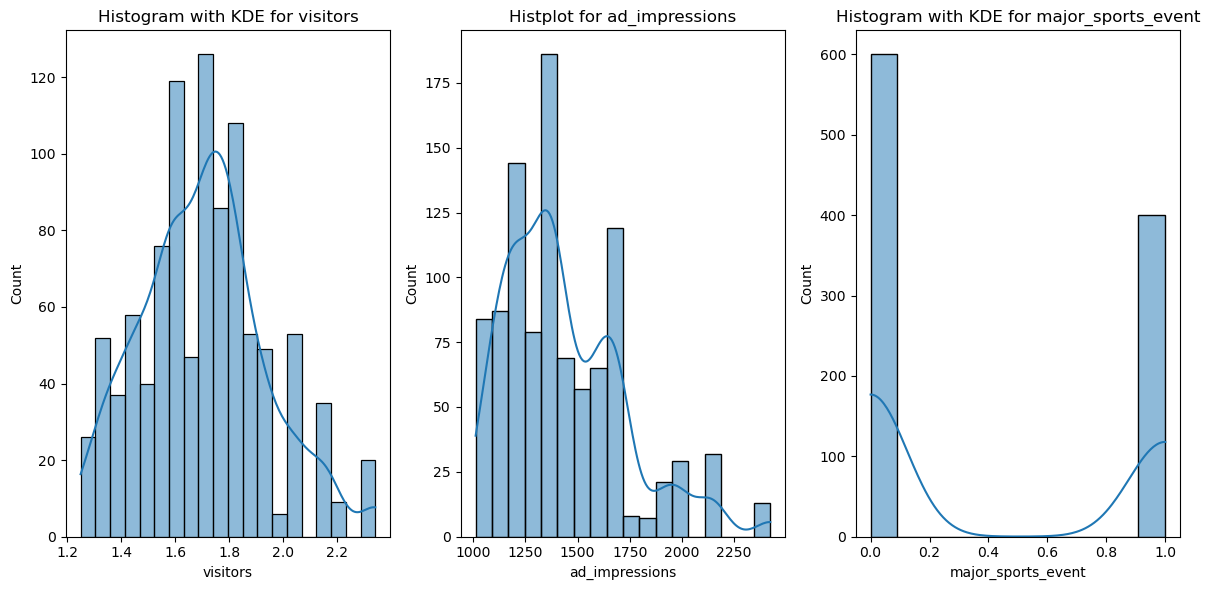

In [67]:
fig, ax = plt.subplots(1,3, figsize = (12,6))

sns.histplot(data=df,x='visitors', kde=True, ax=ax[0])
sns.histplot(data=df,x='ad_impressions', kde=True, ax=ax[1])
sns.histplot(data=df,x='major_sports_event', kde=True, ax=ax[2])

ax[0].set_title('Histogram with KDE for visitors')
ax[1].set_title('Histplot for ad_impressions')
ax[2].set_title('Histogram with KDE for major_sports_event')

plt.tight_layout()
plt.show()

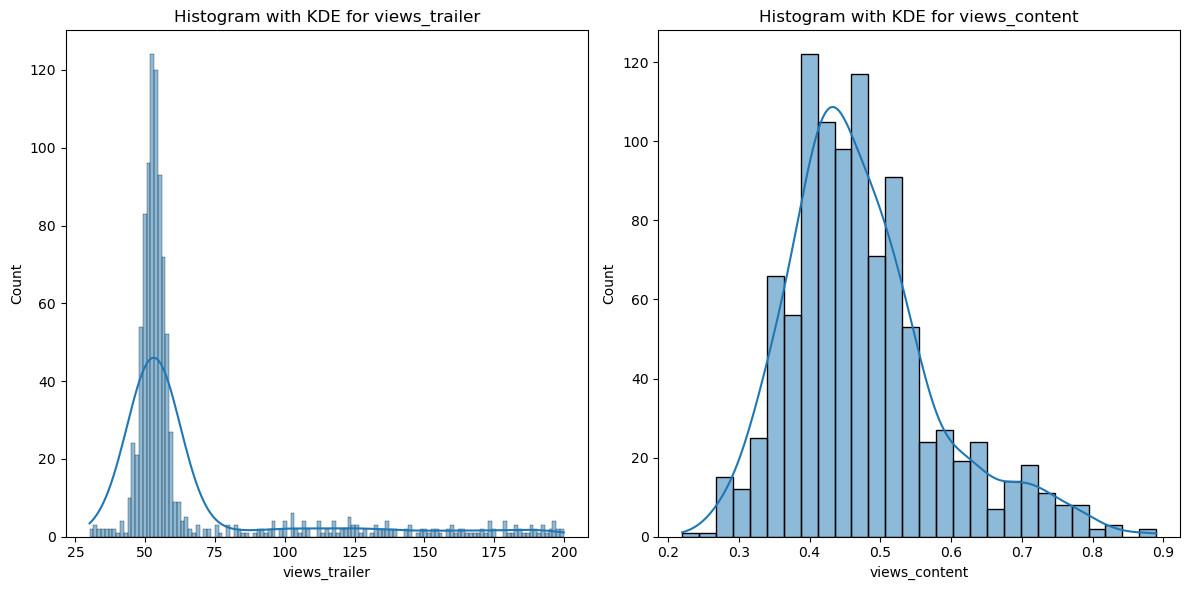

In [68]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.histplot(data=df,x='views_trailer', kde=True, ax=ax[0])
sns.histplot(data=df,x='views_content', kde=True, ax=ax[1])

ax[0].set_title('Histogram with KDE for views_trailer')
ax[1].set_title('Histogram with KDE for views_content')

plt.tight_layout()
plt.show()

#### Insights:

- Visitors: Normal distribution, peaking around 1.7-1.8, with slight right skew.
- Ad Impressions: Right-skewed, most values between 1200-1600, fewer high impressions.
- Major Sports Events: Binary distribution, mostly concentrated at 0 (no event) and 1 (event).
- Trailer Views: Strong right skew, most views between 40-60, few high outliers.
- Content Views: Nearly normal, peaking around 0.4, slight right skew.

In [70]:
df.select_dtypes(include=object).columns

Index(['genre', 'dayofweek', 'season'], dtype='object')

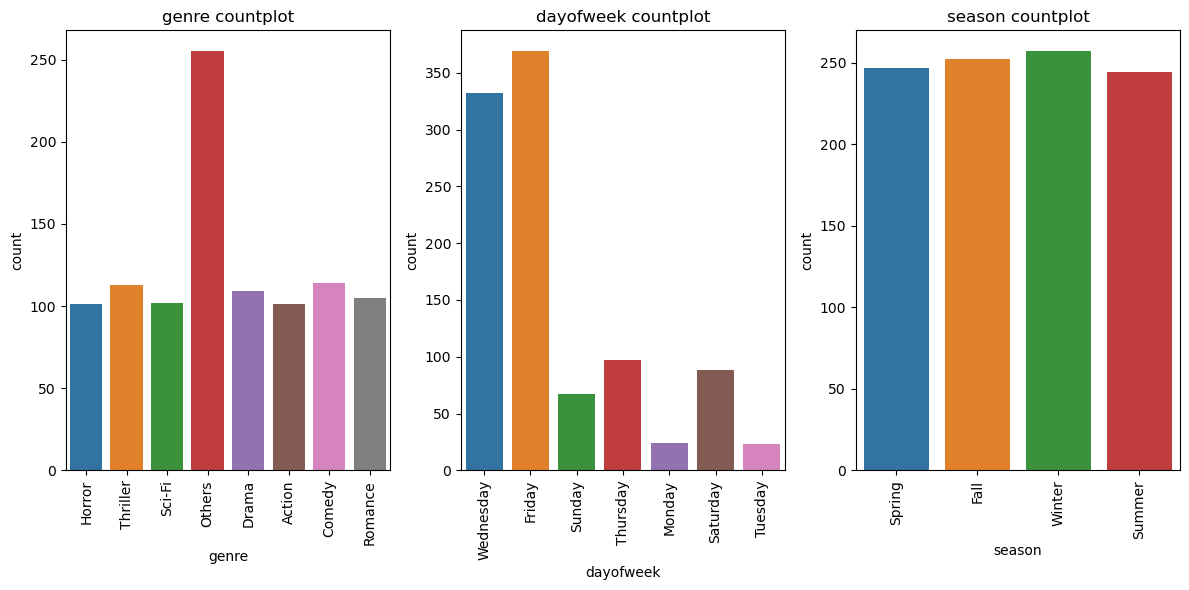

In [71]:
fig, ax = plt.subplots(1,3, figsize = (12,6))

sns.countplot(data=df,x='genre', ax = ax[0])
sns.countplot(data=df,x='dayofweek', ax = ax[1])
sns.countplot(data=df,x='season', ax = ax[2])

ax[0].set_title('genre countplot')
ax[1].set_title('dayofweek countplot')
ax[2].set_title('season countplot')

ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Insights:

- Genre: The "Others" genre is the most frequent, with over 250 occurrences, while the other genres have a more even distribution.
- Day of the Week: Wednesday and Friday are the most popular days for activity, significantly higher than other days.
- Season: All four seasons have similar counts, with slight variations, indicating no strong seasonality trends.

### Bivariate analysis

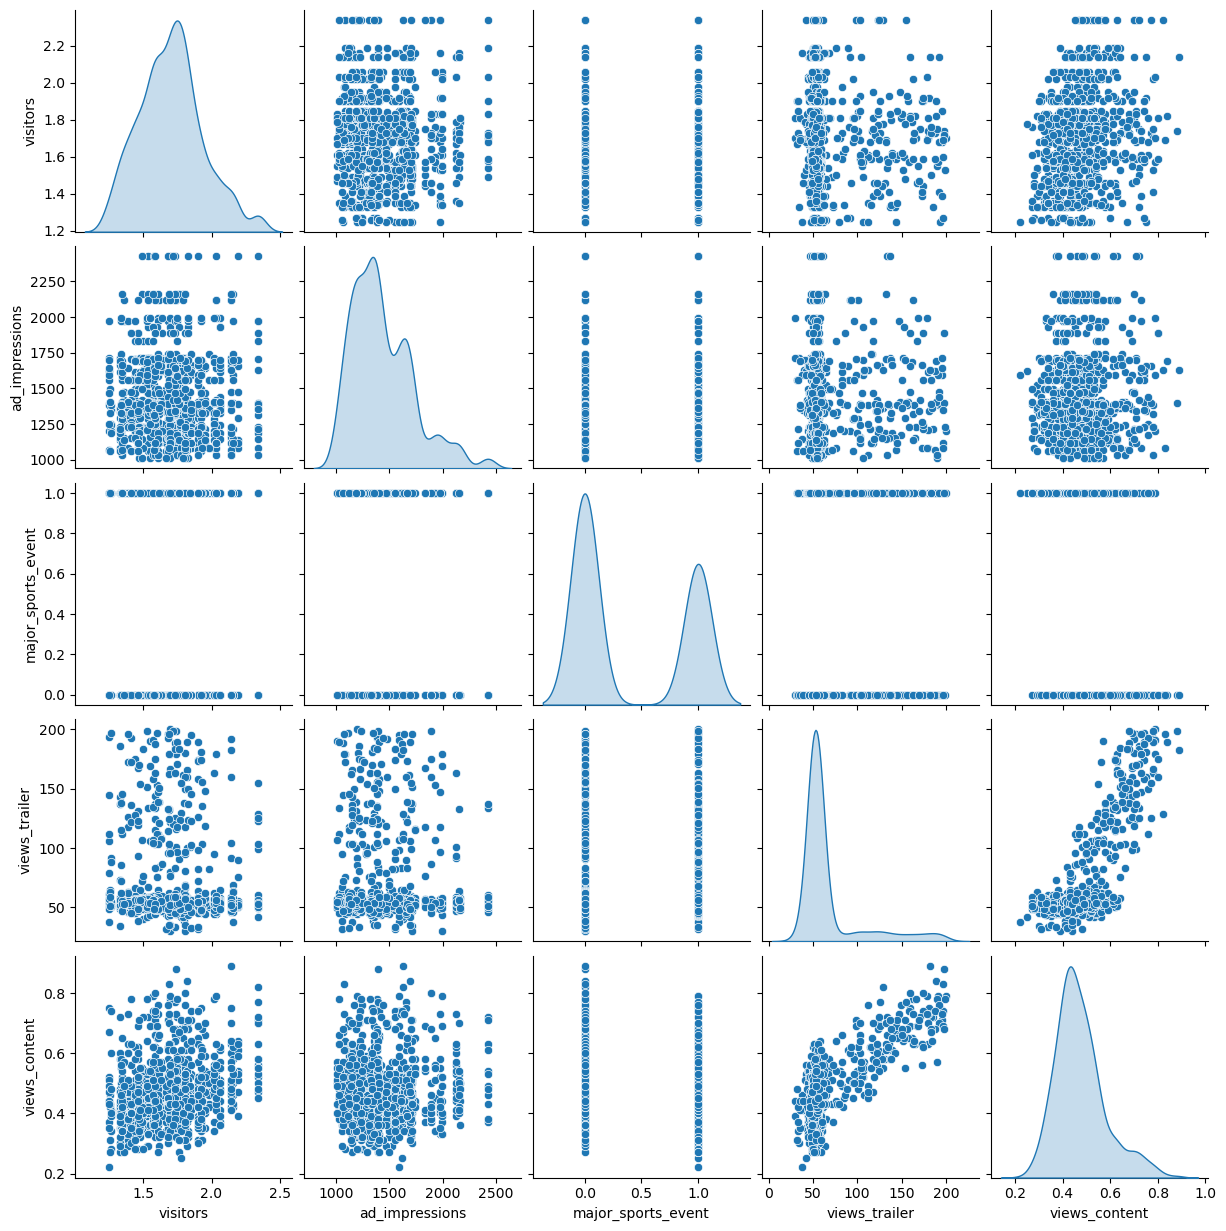

In [73]:
sns.pairplot(df, diag_kind="kde")
plt.show()

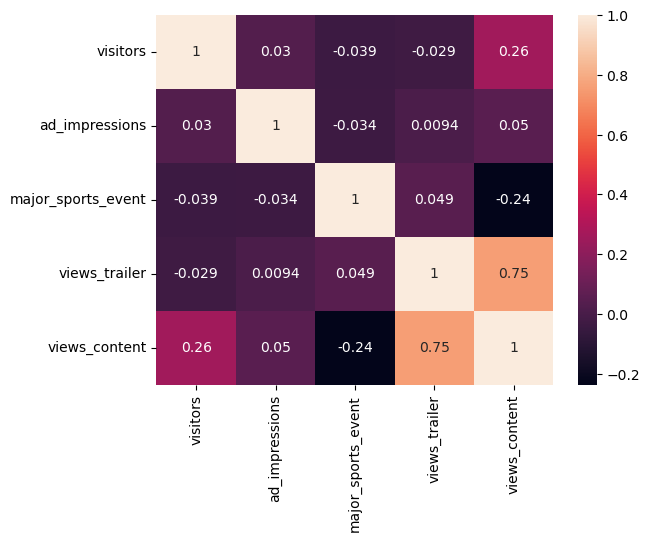

In [74]:
sns.heatmap(data = df.corr(), annot=True) 
plt.show()

#### Insights:

-  There is a high positive correlation between views_trailer and views_content (0.75), indicating that users who view trailers are likely to watch the content as well.
- A moderate correlation exists between visitors and views_content (0.26), suggesting that as the number of visitors increases, content views also tend to increase slightly.
- There is a weak negative correlation between major_sports_event and views_content (-0.24), implying that during major sports events, content views tend to decrease.

### 1. What does the distribution of content views look like?

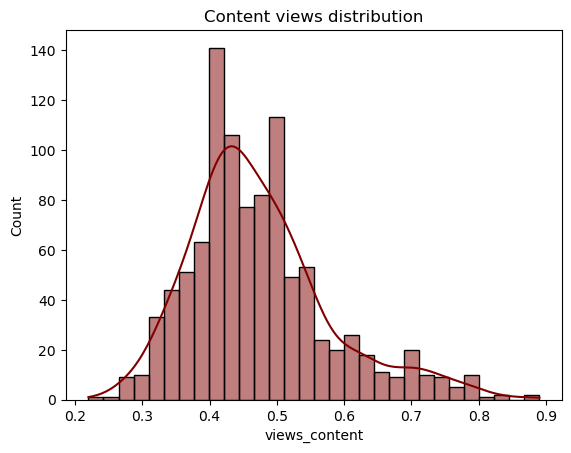

In [75]:
sns.histplot(df['views_content'], bins=30, kde=True, color='maroon')
plt.title('Content views distribution')
plt.show()

### 2. What does the distribution of genres look like?


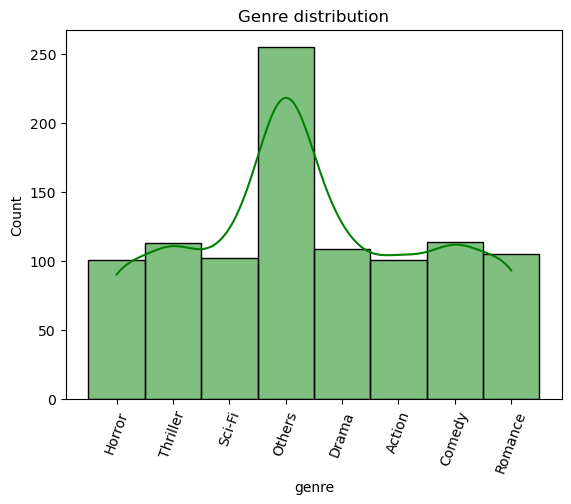

In [76]:
sns.histplot(df['genre'], bins=50, kde=True, color='green')
plt.xticks(rotation = 70)
plt.title('Genre distribution')
plt.show()

#### Insights:

- Content Views Distribution: The majority of content views are centered around the 0.4 mark, with a slightly right-skewed distribution, indicating that most users view about 40% of the content, with fewer users watching more than 50%.
- Genre Popularity: The "Others" genre has the highest count of viewers, significantly more than other genres, while "Thriller," "Horror," and "Comedy" have relatively similar, moderate viewer counts.

### 3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

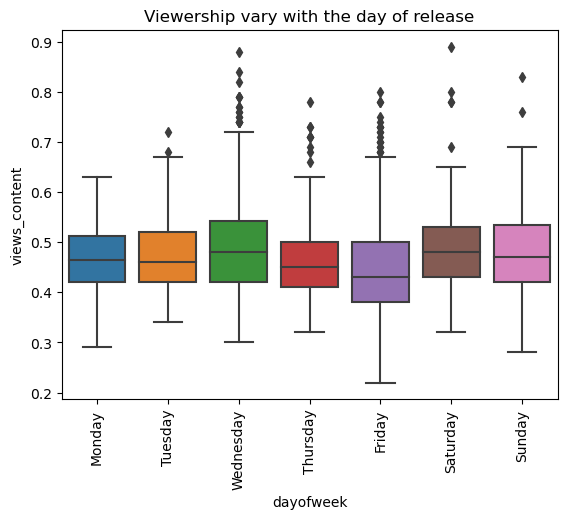

In [77]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(data=df, x='dayofweek', y='views_content', order=days_order)
plt.xticks(rotation = 90)
plt.title('Viewership vary with the day of release')
plt.show()

#### Insights:

- The median line within each boxplot is roughly at the same level, indicating that the typical number of views_content is relatively consistent throughout the week.
- The size of the boxes and the whiskers are comparable across days, suggesting that the variability in views_content is similar on different days.

### 4. How does the viewership vary with the season of release?

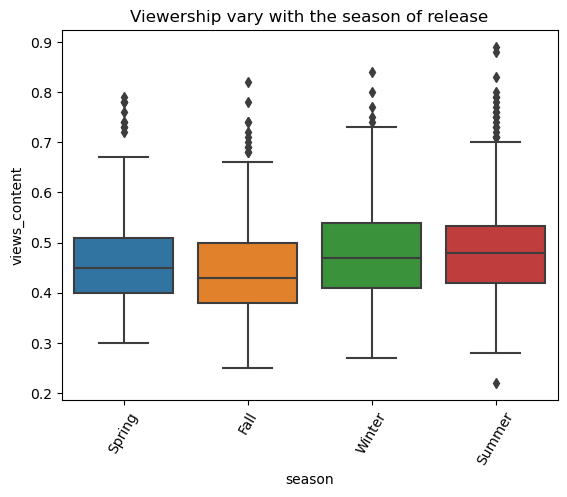

In [78]:
sns.boxplot(data=df, x='season', y='views_content')
plt.xticks(rotation = 60)
plt.title('Viewership vary with the season of release')
plt.show()

#### Insights:

- The median line within each boxplot is roughly at the same level, indicating that the typical number of views_content is relatively consistent throughout the year.
- The size of the boxes and the whiskers are comparable across seasons, suggesting that the variability in views_content is similar in different seasons.

### 5. What is the correlation between trailer views and content views?


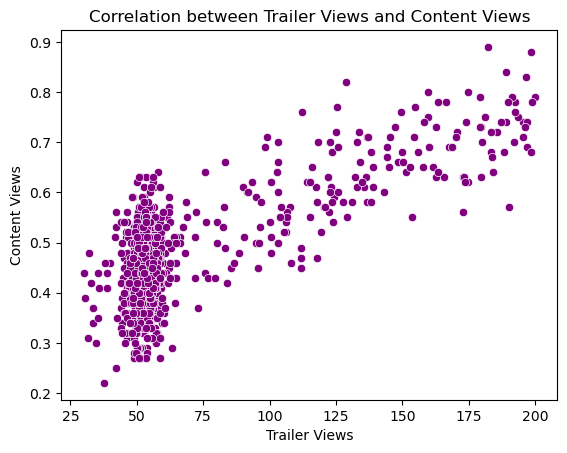

In [79]:
sns.scatterplot(x='views_trailer', y='views_content', data=df, color='purple')

plt.title('Correlation between Trailer Views and Content Views')
plt.xlabel('Trailer Views')
plt.ylabel('Content Views')
plt.show()

#### Insights:

- As the number of Trailer Views increases, the number of Content Views tends to increase as well. This suggests that there is a positive relationship between these two variables.
- While there is a clear upward trend, there is also some scatter around the line. 

## Data preprocessing

In [81]:
df.duplicated()   # to view if any duplicate columns are in the dataset
print("Any duplicate columns in the dataset: ", df.duplicated().sum())

Any duplicate columns in the dataset:  0


In [83]:
df.isna().sum()   # to view missing values

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [84]:
df.nunique()   # to check unique values count

visitors               56
ad_impressions         80
major_sports_event      2
genre                   8
dayofweek               7
season                  4
views_trailer         799
views_content          61
dtype: int64

In [86]:
df.describe()   # statistical descriptive

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


In [88]:
# Outliers treatment

In [8]:
numerical_cols = ['visitors', 'ad_impressions', 'views_trailer', 'views_content']


# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numerical columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

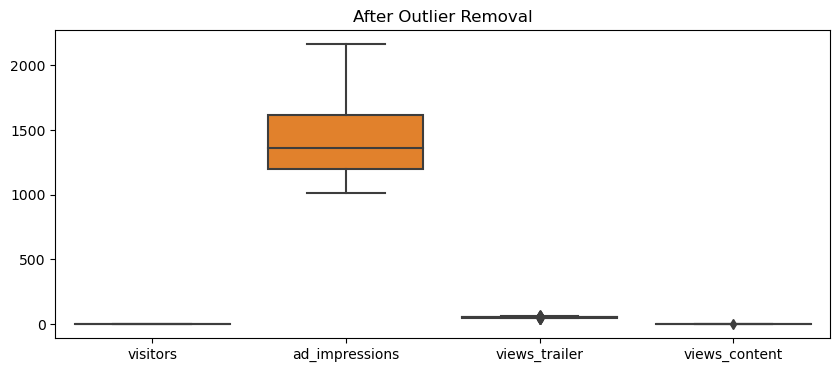

In [59]:
# Plot boxplot after removing outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_clean_iqr[numerical_cols])
plt.title('After Outlier Removal')
plt.show()

In [89]:
# Feature engineering

In [16]:
# Apply one-hot encoding to categorical columns

encoded_data = pd.get_dummies(df, columns=['genre', 'dayofweek', 'season'], drop_first=True)
encoded_data.head()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0,56.70,0.51,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.46,1498.41,1,52.69,0.32,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.47,1079.19,1,48.74,0.39,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.85,1342.77,1,49.81,0.44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.46,1498.41,0,55.83,0.46,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [90]:
# Data preparation for modeling

In [ ]:
X = encoded_data.drop(columns=['views_content'])  # Assuming 'views_content' is the target
y = encoded_data['views_content']

#### Insights:

- There is no missing values and no duplicate values
- The mean values of all the numerical columns were 1.704290, 1434.712290, 0.400000, 66.91559, and 0.473400
- The std of all the numerical columns were 0.231973, 289.534834, 0.490143, 35.00108, and 0.105914
- The outliers were treated using IQR Interquartile Range method.
- One-Hot encoding has been performed for feature engineering to create a dummy columns of 'genre', 'dayofweek', and 'season'
- The model was prepared where X contains all columns except views_content and y dependent variable contains views_content

# Model building - Linear Regression 

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients with column names
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                Feature  Coefficient
0              visitors     0.128909
1        ad_impressions     0.000008
2    major_sports_event    -0.059559
3         views_trailer     0.002311
4          genre_Comedy     0.004389
5           genre_Drama     0.010636
6          genre_Horror     0.009434
7          genre_Others     0.004984
8         genre_Romance    -0.001385
9          genre_Sci-Fi     0.010008
10       genre_Thriller     0.011518
11     dayofweek_Monday     0.045065
12   dayofweek_Saturday     0.052561
13     dayofweek_Sunday     0.038818
14   dayofweek_Thursday     0.019637
15    dayofweek_Tuesday     0.032412
16  dayofweek_Wednesday     0.049532
17        season_Spring     0.023201
18        season_Summer     0.044605
19        season_Winter     0.026532


#### Insights:

- The number of visitors has a strong positive influence (0.1289) on the target variable.
- These have a negative effect (-0.0596), indicating they might reduce the target metric.
- Sunday (0.0838) and Saturday (0.0526) show higher positive impacts, while the romance genre slightly reduces the target (-0.0014).

In [15]:
# Use statsmodels to get detailed statistics
X_train_sm = sm.add_constant(X_train)  # Add constant term to the model
sm_model = sm.OLS(y_train, X_train_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     143.8
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          2.53e-245
Time:                        12:27:42   Log-Likelihood:                 1279.0
No. Observations:                 800   AIC:                            -2516.
Df Residuals:                     779   BIC:                            -2418.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0548    

#### Insights:

- The model explains 78.7% of the variance in views_content, as indicated by the R-squared value.
- The overall model is statistically significant (p-value < 0.001), as shown by the F-statistic.
- There are 20 predictors in the model, and it has a strong fit based on the AIC and BIC scores.

# Testing the assumptions of linear regression model

In [18]:
# 1. Linearity and Residual Plot (Homoscedasticity)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

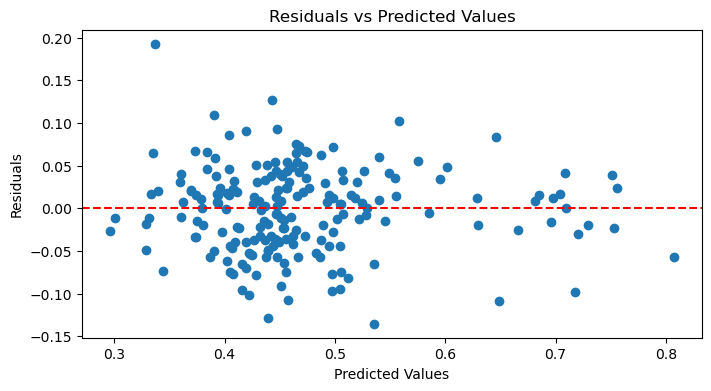

In [91]:
# Plotting predicted vs residuals to check homoscedasticity
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

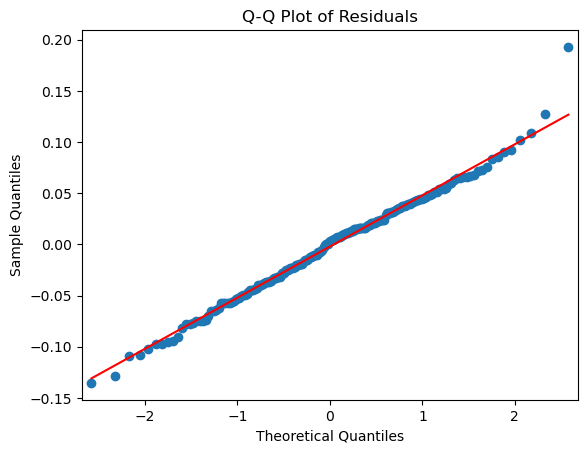

In [20]:
# 2. Normality of Residuals (Q-Q Plot)

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [37]:
# 3. Multicollinearity (VIF - Variance Inflation Factor)

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i)
                  for i in range(len(predictors.columns))]
    return vif

In [38]:
checking_vif(X_train)

,feature,VIF
0,visitors,26.065912
1,ad_impressions,19.731307
2,major_sports_event,1.742907
3,views_trailer,4.511708
4,genre_Comedy,1.939941
5,genre_Drama,2.068384
6,genre_Horror,2.037733
7,genre_Others,3.261380
8,genre_Romance,2.038509
9,genre_Sci-Fi,1.937147


In [39]:
# Treating high VIF multicollinearity

def treating_multicollinearity(predictors, target, high_vif_columns):
    adj_r2 = []
    rmse = []
    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]
        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [43]:
col_list = ["visitors","ad_impressions"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ad_impressions,0.989387,0.050134
1,visitors,0.978909,0.070673


In [51]:
# Drop high VIF columns
cols_to_drop = ["ad_impressions", "visitors"] 

# Drop the specified columns from the training and test sets
x_train2 = X_train.loc[:, ~X_train.columns.isin(cols_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.isin(cols_to_drop)]

# Recheck VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ['visitors', 'ad_impressions']


,feature,VIF
0,major_sports_event,1.728266
1,views_trailer,3.819019
2,genre_Comedy,1.515557
3,genre_Drama,1.604413
4,genre_Horror,1.459541
5,genre_Others,2.057467
6,genre_Romance,1.489276
7,genre_Sci-Fi,1.482409
8,genre_Thriller,1.500718
9,dayofweek_Monday,1.058437


In [56]:
x_train2_const = sm.add_constant(x_train2)

olsmod1 = sm.OLS(y_train, x_train2_const).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     105.1
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          1.88e-194
Time:                        14:10:53   Log-Likelihood:                 1153.0
No. Observations:                 800   AIC:                            -2268.
Df Residuals:                     781   BIC:                            -2179.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2909    

#### Insights:

- The residuals are scattered randomly around the zero line, indicating a fairly unbiased model.
- There are no visible patterns in the residuals, suggesting that the model captures most of the underlying relationships well.
- The Q-Q plot shows that the residuals follow the theoretical quantiles closely, indicating that the data is approximately normally distributed, with slight deviations at the tails.
- There are 2 columns with very high VIF values, indicating presence of strong multicollinearity. We will systematically drop numerical columns with VIF > 10. The columns 'visitors', 'ad_impressions' has been dropped as VIF was higher than 10.

# Model performance evaluation

In [57]:
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared: 0.77


#### Insights:

- The model's predictions are close to actual values, with a Mean Absolute Error (MAE) of 0.04.
- The Root Mean Squared Error (RMSE) of 0.05 indicates a low level of error in the model's predictions.
- The R-squared value of 0.77 shows that the model explains 77% of the variance in the data.